# Informe Operativo de seguridad Balnearia
## Sector: Nautica Este
### Equipo de Trabajo
* Briones Franco
* Salas Daniel
* Pablo Kogan
* Sanchez Micaela (eventual)
* Villavicencio Nicolas (eventual)

### Operación
* Casilla: Balneario Albino Cotro
* Guarda de embarcaciones: Prefectura (isla 132)
* QAP al servicio de Balnearios:
  *  Falher
  *  Albino Cotro
  *  Paseo Limay
* Patrullajes en río Limay:
  * 6km Laguna de los Cisnes - Peninsula Hiroki
  * Base durante la jornada:
    * en frente a curva calle Tronador - costa sur
    * en frente de isla 132 (sector playita) - costa sur
* Embarcaciones
  * Semirrigido ODB3: 
  * Moto de Agua Ruso: Yamaha 



In [2]:
'''
<style type="text/css">
  .jp-InputPrompt,.jp-OutputPrompt,.jp-OutputArea-prompt,.jp-CodeMirrorEditor {
    display: none;
}
</style>
'''
import pandas as pd
df = pd.read_csv("librodeaguas.csv")
#df.dtypes

In [9]:

#df


In [5]:
#selección
#df[['prevenciones','rescates']]

In [6]:
#df.iloc[0:6]

In [4]:
#df[df['embarcacion']=='ODB3']

In [3]:
def transform(fila):
    return fila['prevenciones']+fila['asistencias']+fila['rescates']

def transform_dia(fila):
    return fila['fechaok'].weekday()

def transform_dia_nombre(fila):
    dias=['0Lunes','1Martes','2Miercoles','3Jueves','4Viernes','5Sabado','6Domingo']
    return dias[fila['dia']]
        
#df['totalAsistencias']=df.apply(transform, axis=1)

df['fechaok']=pd.to_datetime(df["fecha"], format='%d-%m-%Y')

df['dia']=df.apply(transform_dia, axis=1)
df['dia_nombre']=df.apply(transform_dia_nombre, axis=1)
#def transform_nro_semana(fila):
#    return int(fila.index()/7)

#df['semanaNumero']=df.apply(transform_nro_semana, axis=1)

   ### Totales Temporada

In [4]:
df.agg({
    'horas':sum,
    'litrosNafta':sum,
    'km':sum,
    'prevenciones':sum,
    'asistencias':sum,
    'rescates':sum
})


horas            107.0
litrosNafta      587.5
km              1008.0
prevenciones     644.0
asistencias       36.0
rescates          14.0
dtype: float64

In [5]:
agrupado_responsable=df.groupby('responsable').agg({
    'horas':sum,
    'litrosNafta':sum,
    'km':sum,
    'prevenciones':sum,
    'asistencias':sum,
    'rescates':sum
})
agrupado_embarcacion=df.groupby('embarcacion').agg({
    'horas':sum,
    'litrosNafta':sum,
    'km':sum,
    'prevenciones':sum,
    'asistencias':sum,
    'rescates':sum
})
agrupado_dia=df.groupby('dia_nombre').agg({
    'horas':sum,
    'litrosNafta':sum,
    'km':sum,
    'prevenciones':sum,
    'asistencias':sum,
    'rescates':sum
})


  ### Total de km recorridos por embarcación y responsable

In [9]:
agrupado_embarcacion


,horas,litrosNafta,km,prevenciones,asistencias,rescates
embarcacion,,,,,,
MRuso,17.0,157.5,180,121,5,3
ODB3,90.0,430.0,828,523,31,11


In [8]:
agrupado_responsable

,horas,litrosNafta,km,prevenciones,asistencias,rescates
responsable,,,,,,
Briones,32.4,201.0,306,198,3,5
Guardia,0.0,0.0,18,0,0,0
Kogan,32.2,149.5,288,190,9,5
Salas,36.4,209.0,342,224,24,3
Sanchez,4.0,20.0,36,17,0,0
Villavicencio,2.0,8.0,18,15,0,1


In [ ]:
import matplotlib.pyplot as plt
agrupado_responsable['km'].plot(kind='bar',title='km de uso embarcación')
plt.show()
agrupado_embarcacion['km'].plot(kind='bar',title='Km de uso embarcación')

plt.show()

  ### Total de horas por embarcación y responsable

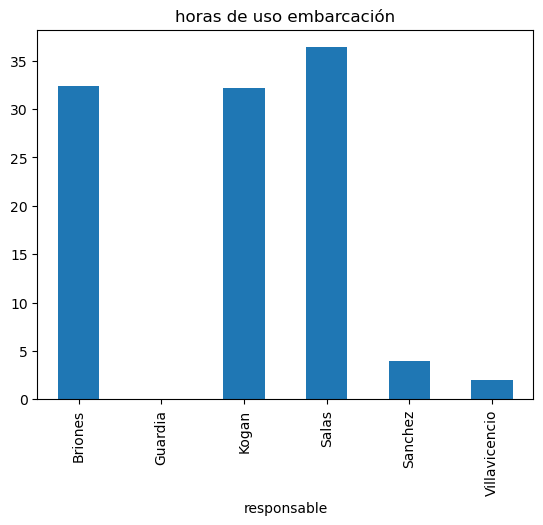

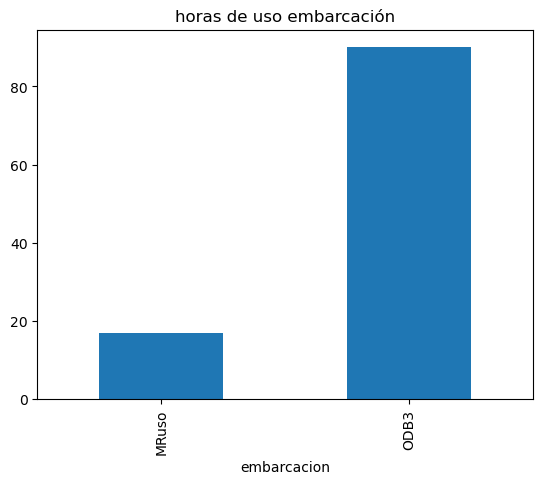

In [17]:
import matplotlib.pyplot as plt
agrupado_responsable['horas'].plot(kind='bar',title='horas de uso embarcación')
plt.show()
agrupado_embarcacion['horas'].plot(kind='bar',title='horas de uso embarcación')

plt.show()

### Prevenciones por día Temporada

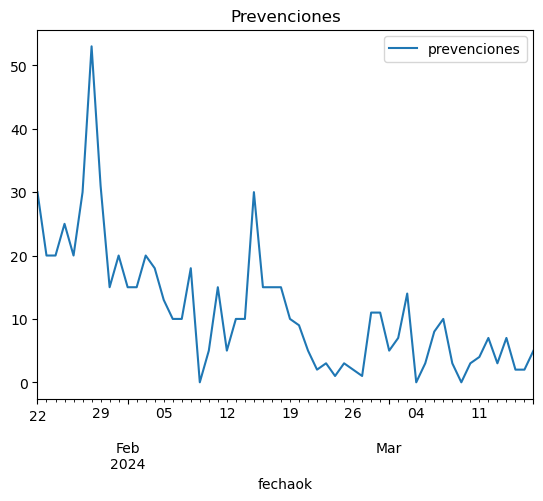

In [18]:
df.plot(kind='line',x='fechaok',y='prevenciones',title='Prevenciones')
plt.show()

### Prevenciones, asistencias y rescates por día de la semana

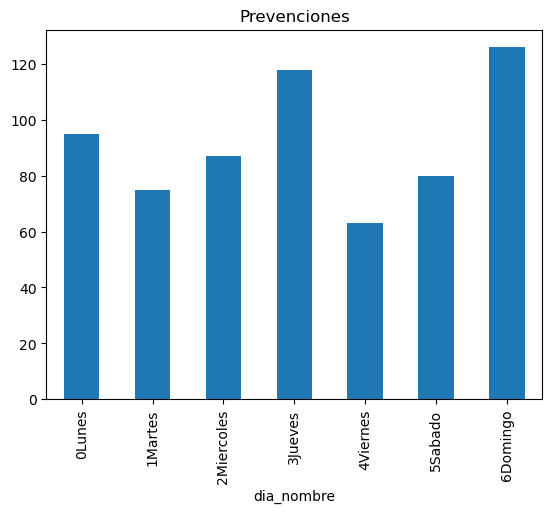

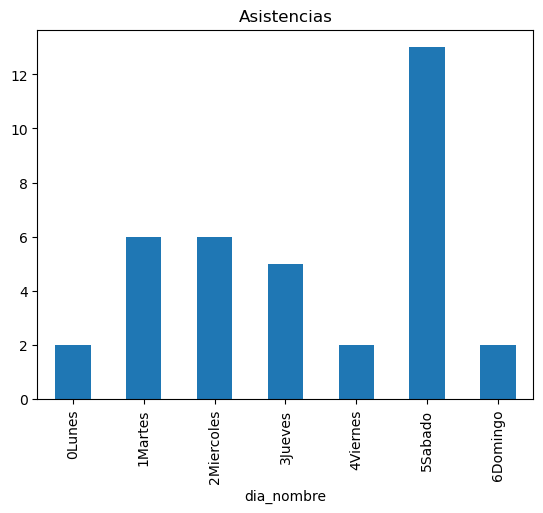

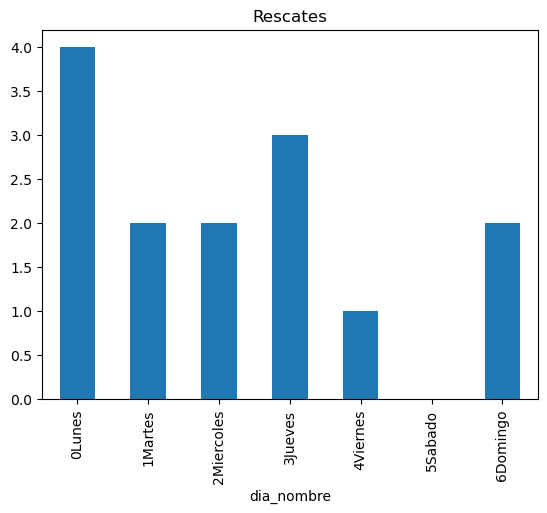

In [19]:
agrupado_dia['prevenciones'].plot(kind='bar',title='Prevenciones')
plt.show()
agrupado_dia['asistencias'].plot(kind='bar',title='Asistencias')
plt.show()
agrupado_dia['rescates'].plot(kind='bar',title='Rescates')
plt.show()
